In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
from scipy import stats
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import pickle
import csv

In [2]:
rlist = []
records = os.path.normpath('mit-bih-dataframes/subject_list.csv')
with open(records) as rfile: #Then we open the file 
                             #The 'with' command only opens the file while we are in it. Automatically closes the file when we're not    
    recordreader = csv.reader(rfile, delimiter=' ', quotechar='|')
    for row in recordreader:
        rlist.append(row[0])

In [24]:
accuracies = pd.read_csv('accuracies.csv', index_col=0)

accuracy_lists = []
for row in accuracies.itertuples():
    accuracy_lists.append([float(acc)*100 for acc in row.Accuracies.split(', ')])

Text(0.5, 1.0, 'Cross-Validation Accuracies For Each Classifier')

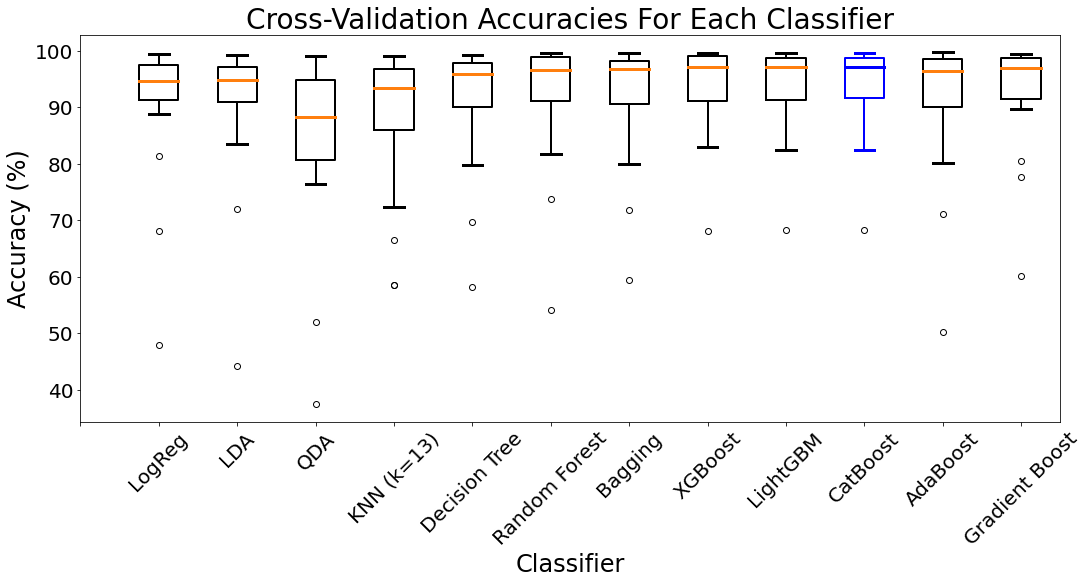

In [81]:
plt.figure(figsize=(15, 8), constrained_layout=True)
boxes = plt.boxplot(accuracy_lists, boxprops={'linewidth': 2}, whiskerprops={'linewidth': 2}, capprops={'linewidth': 3}, medianprops={'linewidth': 3})

boxes['boxes'][9].set(color='blue')
boxes['medians'][9].set(color='blue')
boxes['whiskers'][18].set(color='blue')
boxes['caps'][18].set(color='blue')
boxes['whiskers'][19].set(color='blue')
boxes['caps'][19].set(color='blue')

labels = accuracies.index.tolist()
labels.insert(0, ' ')
plt.xticks(np.arange(13), labels, fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('Classifier', fontsize=24)
plt.ylabel('Accuracy (%)', fontsize=24)
plt.title('Cross-Validation Accuracies For Each Classifier', fontsize=28)